                                    Leading Causes of Deaths

                           Project 2 - Amanda Arce & Tresanne Bonnick

In [1]:
# imports
import pandas as pd
import numpy as np

Also, let's import matplotlib for plotting graphs

`%matplotlib inline` is used for inline plotting of graphs within the notebook

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
project2 = pd.read_csv('https://raw.githubusercontent.com/Tresanne/NYCleadingcausesofdeath/master/NewYorkCityLeadingCausesofDeath.csv')

Here is the dataset for Leading causes of deaths rates

In [4]:
project2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 7 columns):
Year                       1094 non-null int64
Leading Cause              1094 non-null object
Sex                        1094 non-null object
Race Ethnicity             1094 non-null object
Deaths                     1094 non-null object
Death Rate                 1094 non-null object
Age Adjusted Death Rate    1094 non-null object
dtypes: int64(1), object(6)
memory usage: 59.9+ KB


In [5]:
project2.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11,.,.
1,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290,21.7,18.2
2,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60,.,.
3,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045,85.9,98.5
4,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170,19.9,23.3


Looks like there are some garbage values like '.'
Let's convert them to null and get rid of them first.

In [6]:
project2.loc[project2['Deaths'] == '.', 'Deaths'] = np.nan

In [7]:
project2 = project2.dropna()

Currently leading causes data frame has 7 columns.  

In [8]:
project2.shape

(956, 7)

So, earlier we had 1094 rows, and after cleaning it up, we now have 956 rows

In [9]:
project2.drop(['Death Rate','Age Adjusted Death Rate'],axis=1, inplace=True)

For this data frame, I dropped from death rates and age-adjusted death rate to show a cleaner representation of the data collected. 

Also, we don't need to worry about the garbage values which might be in these two dropped columns.

In [10]:
project2.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths
0,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11
1,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290
2,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60
3,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045
4,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170


In [11]:
project2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 1093
Data columns (total 5 columns):
Year              956 non-null int64
Leading Cause     956 non-null object
Sex               956 non-null object
Race Ethnicity    956 non-null object
Deaths            956 non-null object
dtypes: int64(1), object(4)
memory usage: 44.8+ KB


As we can see, `Deaths` column must be int/float values, but instead they are objects. Let's fix it up first.

In [12]:
project2['Deaths'] = project2['Deaths'].astype(np.int64)

In [13]:
project2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 1093
Data columns (total 5 columns):
Year              956 non-null int64
Leading Cause     956 non-null object
Sex               956 non-null object
Race Ethnicity    956 non-null object
Deaths            956 non-null int64
dtypes: int64(2), object(3)
memory usage: 44.8+ KB


Looks good. Let see the data as well !

In [14]:
project2.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths
0,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11
1,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290
2,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60
3,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045
4,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170


By using isnull, you can see that there are no duplicates within the data frame, since I had dropped two columns

In [15]:
project2.isnull().head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


 I used shape in order to see how large this data frame currently is.  

In [16]:
project2.shape

(956, 5)

Now, also see if we have any null values in this dataframe. If we find something, we can remove them afterwards.

In [17]:
project2.notnull().sum()

Year              956
Leading Cause     956
Sex               956
Race Ethnicity    956
Deaths            956
dtype: int64

This means that there are no null values and our dataset is good to go for the analysis.

By grouping leading causes, I was able to find out the data by year of all causes by count, mean, std, min, max, and percentage. 

In [18]:
project2.groupby('Leading Cause').describe()

Deaths  \
Leading Cause                                                           
Accidents Except Drug Posioning (V01-X39, X43, ... count    68.000000   
                                                   mean    109.808824   
                                                   std      86.993782   
                                                   min       5.000000   
                                                   25%      36.750000   
                                                   50%      69.000000   
                                                   75%     171.500000   
                                                   max     297.000000   
All Other Causes                                   count    96.000000   
                                                   mean    812.489583   
                                                   std     780.825447   
                                                   min       8.000000   
                                                   25%      54.500000   
                                                   50%     599.500000   
                                                   75%    1321.500000   
                                                   max    2595.000000   
Alzheimer's Disease (G30)                          count    24.000000   
                                                   mean    124.166667   
                                                   std      79.444083   
                                                   min       8.000000   
                                                   25%      77.000000   
                                                   50%     111.000000   
                                                   75%     164.500000   
                                                   max     276.000000   
Assault (Homicide: Y87.1, X85-Y09)                 count    12.000000   
                                                   mean    175.166667   
                                                   std     114.136149   
                                                   min       5.000000   
                                                   25%      87.500000   
                                                   50%     210.500000   
...                                                               ...   
Mental and Behavioral Disorders due to Accident... std      96.715228   
                                                   min       5.000000   
                                                   25%      17.000000   
                                                   50%     135.000000   
                                                   75%     189.500000   
                                                   max     314.000000   
Nephritis, Nephrotic Syndrome and Nephrisis (N0... count    13.000000   
                                                   mean     57.923077   
                                                   std      33.643874   
                                                   min      13.000000   
                                                   25%      22.000000   
                                                   50%      75.000000   
                                                   75%      86.000000   
                                                   max      93.000000   
Septicemia (A40-A41)                               count     9.000000   
                                                   mean     71.222222   
                                                   std      51.710197   
                                                   min       6.000000   
                                                   25%      16.000000   
                                                   50%      89.000000   
                                                   75%     113.000000   
                                                   max     135.000000   
Viral Hepatitis (B15-B19)                       

At this point, the maximum race-ethnicity is "White Non-Hispanic for leading causes.  

In [19]:
project2['Race Ethnicity'].max()

'White Non-Hispanic'

This data frame shows us by year the amount of deaths which were caused by different scenarios.  

In [20]:
project2.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths
0,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11
1,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290
2,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60
3,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045
4,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170


In [21]:
project2['Sex'].max()

'M'

In [22]:
project2.groupby('Sex').describe()

Deaths         Year
Sex                                
F   count   463.000000   463.000000
    mean    468.835853  2010.628510
    std     948.885799     2.302880
    min       5.000000  2007.000000
    25%      36.500000  2009.000000
    50%     123.000000  2011.000000
    75%     379.500000  2013.000000
    max    7050.000000  2014.000000
M   count   493.000000   493.000000
    mean    421.758621  2010.557809
    std     810.533524     2.317134
    min       5.000000  2007.000000
    25%      36.000000  2009.000000
    50%     152.000000  2011.000000
    75%     290.000000  2013.000000
    max    5632.000000  2014.000000

- Count of Females = 463
- Count of Males = 493

Males are the dominant in this dataset

Let's find the max deaths by a cause now.

In [23]:
project2.groupby('Sex')['Year'].count()

Sex
F    463
M    493
Name: Year, dtype: int64

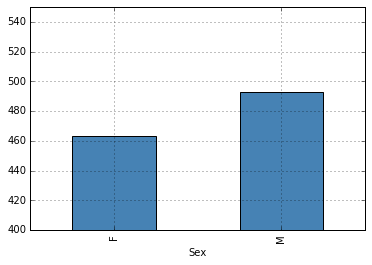

In [24]:
project2.groupby('Sex')['Year'].count().plot(kind='bar', ylim=(400,550), grid=True, color='steelblue')

In [25]:
project2.loc[project2['Deaths'].idxmax()]

Year                                                        2007
Leading Cause     Diseases of Heart (I00-I09, I11, I13, I20-I51)
Sex                                                            F
Race Ethnicity                                White Non-Hispanic
Deaths                                                      7050
Name: 833, dtype: object

Appears, 7050 was the maximum deaths in year 2007 due to Disease of Heart (I00-I09, I11, I13, I20-I51)

Deaths by every year and it's plot

In [26]:
project2.groupby('Year')['Deaths'].sum()

Year
2007    53996
2008    54138
2009    52820
2010    52505
2011    52726
2012    52420
2013    53387
2014    53006
Name: Deaths, dtype: int64

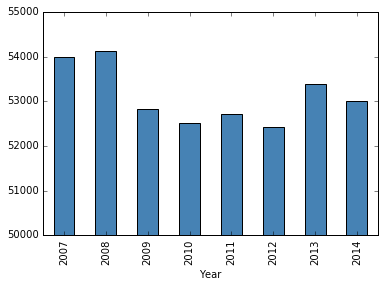

In [27]:
project2.groupby('Year')['Deaths'].sum().plot(kind='bar', color='steelblue', ylim=(50000,55000))

Total number of deaths

In [28]:
project2['Deaths'].sum()

424998

In [29]:
project2.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths
0,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11
1,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290
2,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60
3,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045
4,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170
